In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91987\Downloads\drive-download-20221030T054508Z-001\Advertising.csv",index_col=0,header=0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
df.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# to check missing values


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

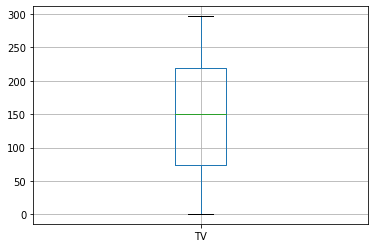

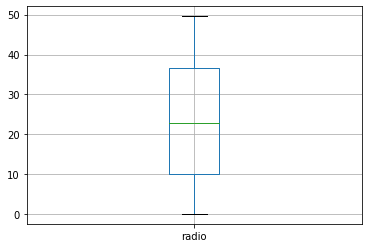

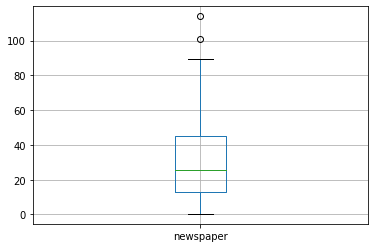

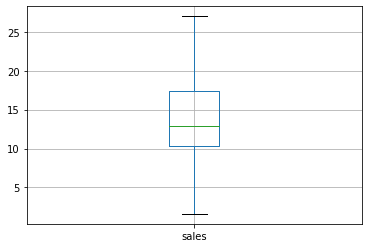

In [8]:
# Assumption 1 : THere should be no outliers in the data 
# check using boxplot
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

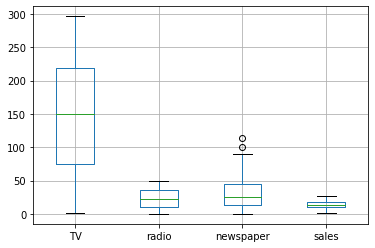

In [9]:
df.boxplot()

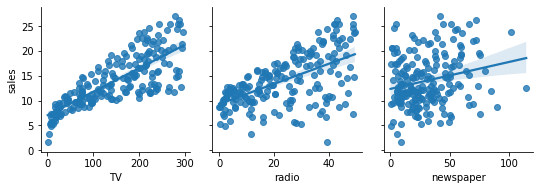

In [10]:
# Assumption 2 : Assumption of Linearity : Every independent variable should have ,a linear realationship with dependent variable
sns.pairplot(df,x_vars=['TV','radio','newspaper'],
            y_vars='sales',kind='reg' )

In [11]:
# we can elimnate those variables which do not show relationship with dependent variables this helps in feature selection For
# example in this case newspaper

In [12]:
#data.drop(["newspaper"],axis=1,inplace=True)

In [13]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [14]:
# create X and Y
X=df[['TV','radio','newspaper']]
Y=df['sales']
# if we want using indexing
#X=df.iloc[:,0:-1]
#Y=df.iloc[:;-1]

In [15]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [16]:
#import warnings
#warnings.filterwarnings("ignore")

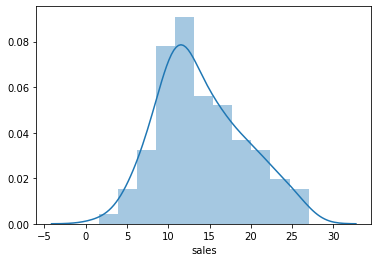

In [17]:
# Assumption no 3 
# Assumption of Normality : The dependent variable should follow an 
# approximate normal distribution
sns.distplot(Y)

In [18]:
# if the y variable is highly skewed then only perform log transformation
# log transformation is performed only once 
# Log transformation
#import numpy as np
# Y_log=np.log(Y)
#sns.distplot(Y_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9916A4F88>,
      dtype=object)

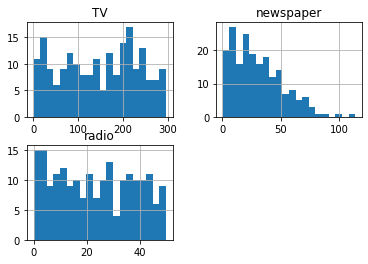

In [19]:
X.hist(bins=20)

In [20]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\91987\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
# if the variable consists 0 value use log1p instead of logp these will help in avoiding infinite value problem

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


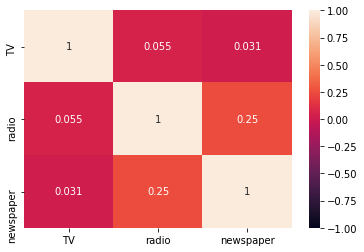

In [22]:
# Assumption of no multicollinearity : there should be no multicollinearity between the 
# independent variables 
# multicollinearity is the relationship amongst the independent variables
corr_df=X.corr(method='pearson')
print(corr_df)
sns.heatmap(corr_df,vmax=1,vmin=-1,annot=True)

In [23]:
# if their is any pair found with high correlation then we can eliminate one variable out of it
#( after logical thinking this helps in feature selection)

In [24]:
# another method to check multicollinearity is variance inflation factor(VIF)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

 



,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [26]:
#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code

In [27]:
from sklearn.model_selection import train_test_split
# Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [28]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [29]:
from sklearn.linear_model import LinearRegression
#create a model object 
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.353291385815158
[ 0.0437425   0.19303708 -0.04895137]


In [30]:
# pair the feature names with the coefficients 
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742163), ('radio', 0.19303707897345293), ('newspaper', -0.04895136822248809)]


In [31]:
X1=100
X2=200
X3=np.log1p(0)
Y_pred=3.353291385815147+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.334957385815144


In [32]:
# predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [33]:
lm.score(X_train,Y_train)
#Y_pred=lm.prdict(X_train)
# score=r2_score(Y_train,Y_pred)

0.920898664750022

In [34]:
# score function will always  give a high r score because training data is already known to the model

In [35]:
new_df=pd.DataFrame()
new_df=X_test.copy()
new_df['Actual Sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df

,TV,radio,newspaper,Actual Sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [36]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


In [37]:
print(Y_test.min())
print(Y_test.max()) # this are the values from actual values 
# rmse should lie within the range of max and min values 
# ideally it should be as lower as possible 

1.6
25.5


In [38]:
new_df['Deviation']=new_df['Actual Sales']-new_df['Predicted sales']
new_df.to_excel('Sales Predication.xlsx',header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


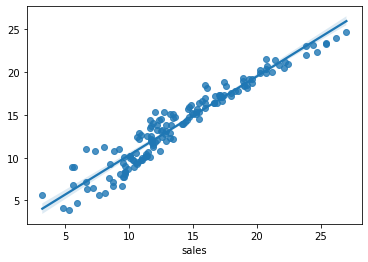

In [39]:
sns.regplot(x=Y_train,y=lm.predict(X_train),ci=95)

In [40]:
from sklearn.model_selection import train_test_split
# Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [41]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train,Y_train)

# print intercept and coeffiecients
print(lm.intercept_)
print(lm.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [42]:
'''
previous values 
3.353291385815151
[0.0437425, 0.19303708,-0.04895137]
'''

'\nprevious values \n3.353291385815151\n[0.0437425, 0.19303708,-0.04895137]\n'

In [43]:
Y_pred=lm.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


In [45]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(X_train,Y_train)

# print intercept and coeffiecients
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [46]:
Y_pred=lm.predict(X_test)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


In [48]:
# using stats model
# there are two ols models
#OLS -->OLS(Y_train,X_train)
#ols-->ols(Y~)X1+X2+X3)

In [49]:
#fit(X_train,Y_train)-->sklearn
#Y~X1+X2+X3,data=df--> statsmodels

In [50]:
new_df=pd.DataFrame()
new_df=X_train.copy()

new_df['sales']=Y_train.copy()
new_df.shape


(160, 4)

In [51]:
import statsmodels.formula.api as sm

# create a fitted model with all the three features
lm_model=sm.ols(formula='sales~TV+radio+newspaper',
             data=new_df).fit()
# print the coefficients 
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.10e-85
Time:                        11:31:32   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [52]:
# Assumption no 5 
# There should be no auto correlation between data
# Can be checked using Durbin Watson test

In [53]:
Y_pred_new=lm_model.predict(X_test)

In [54]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


In [55]:
# excluding newspaper

In [56]:
import statsmodels.formula.api as sm
lm_model=sm.ols(formula='sales~TV+radio',
             data=new_df).fit()
# print the coefficients 
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           3.47e-87
Time:                        11:31:33   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [57]:
Y_pred_new=lm_model.predict(X_test) # test data without newspaper


In [58]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.58788170773781
Adj R-square: 0.8329310387377037


Text(0, 0.5, 'Residuals')

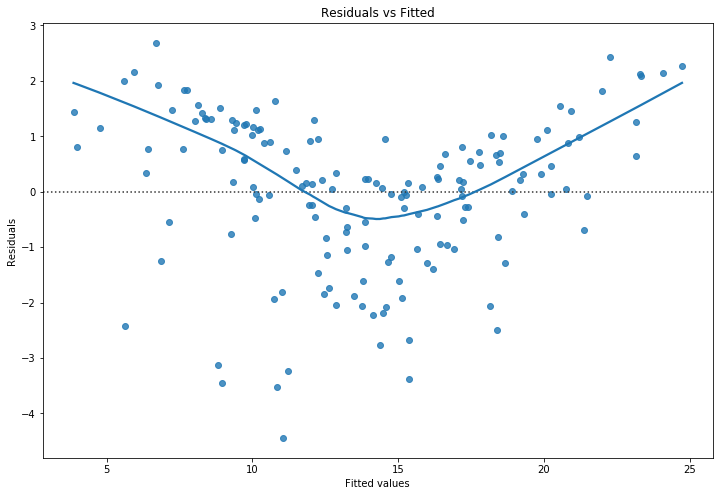

In [59]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [60]:
# line that is fitted into error points should be random and should not follow wave like pattern

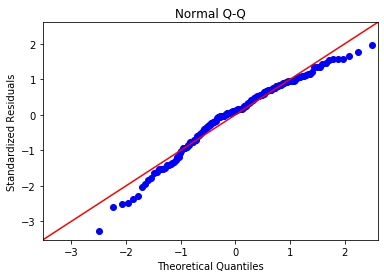

In [61]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 



In [62]:
# the error points are being compared to standard noraml distribution data (theortical quantiles)
# the error points should follow red diagnol line this indicates that errors are following a normal distribution


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

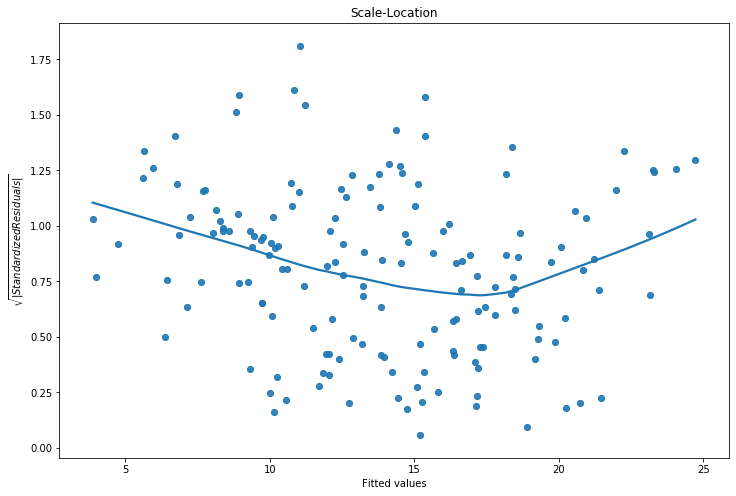

In [63]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

In [64]:
# we are trying to check variance across error points and approximate horizontal line indicates that variance is constant 
# throught the error
# we dont want steep curves because that will indicate hetroskadcity

# SGD

In [65]:
# create X and Y
X=df[['TV','radio','newspaper']]
Y=df['sales']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
# scaler.fit(X)
# X=scaler.transform(X)
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [67]:
from sklearn.model_selection import train_test_split
# Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.1,  #alpha
                  shuffle=True, 
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True, 
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)



[14.00056539]
[3.96282177 2.9563359  0.02107504]


In [69]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print("R_squared=",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE=",rmse)

adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted r squared=",adjusted_r_squared)

R_squared= 0.8440514160249312
RMSE= 2.5193340417009136
Adjusted r squared= 0.8416644479028638


In [70]:
pd.set_option('display.float_format','{:.4f}'.format)

In [71]:
lm.n_iter_ # no of epochs

11

In [72]:
lm.t_ # no of iterations 

1761.0